In [1]:
%pylab inline
figsize(8,8)
import sys
import rootpath
sys.path.append(rootpath.detect())

Populating the interactive namespace from numpy and matplotlib


In [2]:
def normalise_to_axes(x, axes=None):
    r = 1
    assert x.ndim == 2
    axes = np.ones(x.shape[1]) if axis is None else np.array(axes)
    
    x_norm = np.zeros_like(x)
    for i, xi in enumerate(x):
        lmbda = sqrt(r**2/np.sum([xi[j]**2/axes[j]**2 for j in range(x.shape[1])]))
        x_norm[i] = xi*lmbda
        
    return x_norm

In [24]:
## spehere parameters
r = 1      # sphere radius
N = 20000   # number of points 

In [25]:
def normalise_length(points):
    magnitudes = sqrt(diag(dot(points, points.T)))
    return points/magnitudes.reshape(-1,1)

## 2D

**Illustration of problem:** Points evenly distributed by even distribution of angles around origin. 

In [19]:
a = 6
b = 1
c = 1

# distribute angles
n_points = 100
angs = linspace(0, 2*pi, n_points+1)[:-1]

# plot elispe
fx = lambda a, theta: a*cos(theta)
fy = lambda b, theta: b*sin(theta)

angs = np.linspace(0,2*pi, n_points)

# circle points
circ_x = fx(1, angs)
circ_y = fy(1, angs)
# elipse points
elip_x = fx(a, angs)
elip_y = fy(b, angs)

fig = figure()
ax = fig.gca()
ax.set_aspect('equal')

ax.scatter(circ_x, circ_y, c="C0", s=5)
ax.scatter(elip_x, elip_y, c="C1", s=5)

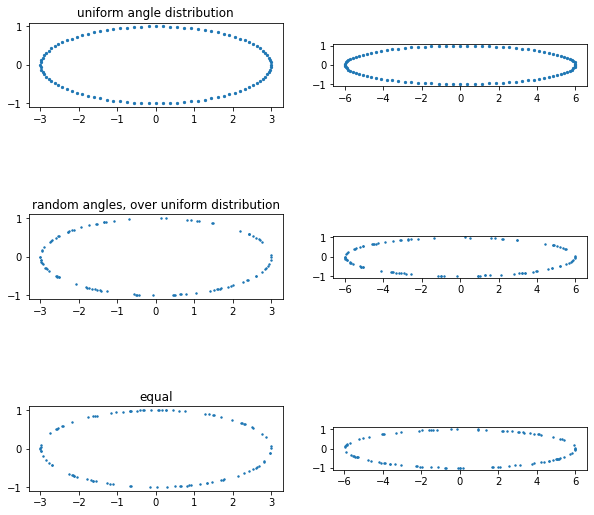

In [6]:
fig = figure(figsize=[10,10])
ax_0 = fig.add_subplot(3,2,1)
ax_1 = fig.add_subplot(3,2,3)
ax_2 = fig.add_subplot(3,2,5)

ax__0 = fig.add_subplot(3,2,2)
ax__1 = fig.add_subplot(3,2,4)
ax__2 = fig.add_subplot(3,2,6)

ax_0.set_aspect("equal")
ax_1.set_aspect("equal")
ax_2.set_aspect("equal")
ax__0.set_aspect("equal")
ax__1.set_aspect("equal")
ax__2.set_aspect("equal")

ax_0.set_title("uniform angle distribution")
ax_1.set_title("random angles, over uniform distribution")
ax_2.set_title("equal")
# major and minor axes
a = 3 
b = 1
a2 = 6

thetas = np.linspace(0,2*pi, 100+1)[:-1]
ps = np.array([a*cos(thetas), b*sin(thetas)]).T
ax_0.scatter(*ps.T, s=5)
ps = np.array([a2*cos(thetas), b*sin(thetas)]).T
ax__0.scatter(*ps.T, s=5)

thetas_r = np.random.uniform(0, 2*pi, 100)
ps = np.array([a*cos(thetas_r), b*sin(thetas_r)]).T
ax_1.scatter(*ps.T, s=2)
ps = np.array([a2*cos(thetas_r), b*sin(thetas_r)]).T
ax__1.scatter(*ps.T, s=2)

ps = normalise_to_axes(np.random.multivariate_normal([0, 0], np.diag([a,b]), size=100), [a,b])
ax_2.scatter(*ps.T, s=2)
ps = normalise_to_axes(np.random.multivariate_normal([0, 0], np.diag([a2**2, b**2]), size=100), [a2, b])
ax__2.scatter(*ps.T, s=2)

In [48]:
x3 = np.random.randn(2000, 3)*np.array([a,b,c])
x32 = np.random.multivariate_normal([0,0,0], np.diag([a**2,b**2,c**2]), size = 2000)

fig = figure()
ax = fig.gca(projection="3d")
ax.scatter(*x3.T, s=5)

In [49]:
%matplotlib tk

In [51]:
x3_norm = abs(normalise_to_axes(x3, [a, b, c]))
x32_norm = abs(normalise_to_axes(x32, [a, b, c]))

fig = figure()
ax = fig.gca(projection="3d")
ax.set_box_aspect([a,b,c])  # aspect ratio is 1:1:1 in data space

# ax.scatter(*x3_norm.T, s=10)
ax.scatter(*x32_norm.T, s=10, c="C1")